#Student name: Le Quoc Trung
#Studnent ID: 20127369

In [32]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras import models
from keras.datasets import mnist, fashion_mnist
from keras import utils
from keras import Input
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np 

# load data from build-in library

# Fashion MNIST datasets

In [33]:
(x_train_fashion_mnist, y_train_fashion_mnist), (x_test_fashion_mnist, y_test_fashion_mnist) = fashion_mnist.load_data()

In [34]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_nums = len(class_names)
input_shape = (28, 28, 1)

# MNIST data

In [35]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

# Preprocessing, review data

In [36]:
x_train_fashion_mnist = x_train_fashion_mnist.reshape(60000, 28, 28, 1)
x_test_fashion_mnist = x_test_fashion_mnist.reshape(10000, 28, 28, 1)
x_train_fashion_mnist, x_val_fashion_mnist, y_train_fashion_mnist, y_val_fashion_mnist = train_test_split(x_train_fashion_mnist, 
                                                                                                           y_train_fashion_mnist,
                                                                                                           test_size = 0.1,
                                                                                                           shuffle=True,
                                                                                                           random_state=20127369)
print(x_train_fashion_mnist.shape)
print(y_train_fashion_mnist.shape)
print(x_test_fashion_mnist.shape)
print(y_test_fashion_mnist.shape)

(54000, 28, 28, 1)
(54000,)
(10000, 28, 28, 1)
(10000,)


In [37]:
x_train_mnist = x_train_mnist.reshape(60000, 28, 28, 1)
x_test_mnist = x_test_mnist.reshape(10000, 28, 28, 1)
x_train_mnist, x_val_mnist, y_train_mnist, y_val_mnist = train_test_split(x_train_mnist,
                                                                          y_train_mnist,
                                                                          test_size = 0.1,
                                                                          shuffle=True,
                                                                          random_state=20127369)
print(x_train_mnist.shape)
print(y_train_mnist.shape)
print(x_test_mnist.shape)
print(y_test_mnist.shape)

(54000, 28, 28, 1)
(54000,)
(10000, 28, 28, 1)
(10000,)


In [38]:
# Normalization
x_train_fashion_mnist.astype('float32')/255
y_train_fashion_mnist.astype('float32')/255
x_test_fashion_mnist.astype('float32')/255
y_test_fashion_mnist.astype('float32')/255

array([0.03529412, 0.00784314, 0.00392157, ..., 0.03137255, 0.00392157,
       0.01960784], dtype=float32)

In [39]:
x_train_mnist.astype('float32')/255
y_train_mnist.astype('float32')/255
x_test_mnist.astype('float32')/255
y_test_mnist.astype('float32')/255

array([0.02745098, 0.00784314, 0.00392157, ..., 0.01568628, 0.01960784,
       0.02352941], dtype=float32)

In [40]:
y_train_fashion_mnist = utils.to_categorical(y_train_fashion_mnist)
y_val_fashion_mnist = utils.to_categorical(y_val_fashion_mnist)
y_test_fashion_mnist = utils.to_categorical(y_test_fashion_mnist)

y_train_fashion_mnist = y_train_fashion_mnist.astype('b')
y_val_fashion_mnist = y_val_fashion_mnist.astype('b')
y_test_fashion_mnist = y_test_fashion_mnist.astype('b')


#test
print(y_train_fashion_mnist[1])
print(y_val_fashion_mnist[1])
print(y_test_fashion_mnist[1])

[0 0 0 0 0 1 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0]


In [41]:
y_train_mnist = utils.to_categorical(y_train_mnist)
y_val_mnist = utils.to_categorical(y_val_mnist)
y_test_mnist = utils.to_categorical(y_test_mnist)

y_train_mnist = y_train_mnist.astype('b')
y_val_mnist = y_val_mnist.astype('b')
y_test_mnist = y_test_mnist.astype('b')


#test
print(y_train_fashion_mnist[1])
print(y_val_fashion_mnist[1])
print(y_test_fashion_mnist[1])

[0 0 0 0 0 1 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0]


# CNN

In [42]:
model = models.Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape = input_shape)),
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:
model.build()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_35 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 9216)              0         
                                                                 
 dense_42 (Dense)            (None, 64)                589888    
                                                                 
 dense_43 (Dense)            (None, 10)                650       
                                                     

In [ ]:
history = model.fit(x_train_fashion_mnist,
                    y_train_fashion_mnist,
                    validation_data = (x_val_fashion_mnist, y_val_fashion_mnist),
                    epochs=30,
                    batch_size = 256)

Epoch 1/30
211/211 [==============================] - 4s 12ms/step - loss: 2.0113 - accuracy: 0.7833 - val_loss: 0.3592 - val_accuracy: 0.8732
Epoch 2/30
211/211 [==============================] - 2s 11ms/step - loss: 0.2954 - accuracy: 0.8950 - val_loss: 0.3124 - val_accuracy: 0.8923
Epoch 3/30
211/211 [==============================] - 2s 11ms/step - loss: 0.2390 - accuracy: 0.9137 - val_loss: 0.2753 - val_accuracy: 0.8992
Epoch 4/30
211/211 [==============================] - 2s 11ms/step - loss: 0.2014 - accuracy: 0.9266 - val_loss: 0.2770 - val_accuracy: 0.9022
Epoch 5/30
211/211 [==============================] - 2s 10ms/step - loss: 0.1763 - accuracy: 0.9357 - val_loss: 0.2716 - val_accuracy: 0.9030
Epoch 6/30
211/211 [==============================] - 2s 11ms/step - loss: 0.1538 - accuracy: 0.9443 - val_loss: 0.2715 - val_accuracy: 0.9077
Epoch 7/30
211/211 [==============================] - 2s 11ms/step - loss: 0.1337 - accuracy: 0.9509 - val_loss: 0.2896 - val_accuracy: 0.9120

In [ ]:
test_score = model.evaluate(x_test_fashion_mnist, y_test_fashion_mnist, batch_size = 32)
print(test_score)

313/313 [==============================] - 1s 3ms/step - loss: 0.8243 - accuracy: 0.9002
[0.8243240118026733, 0.9002000093460083]


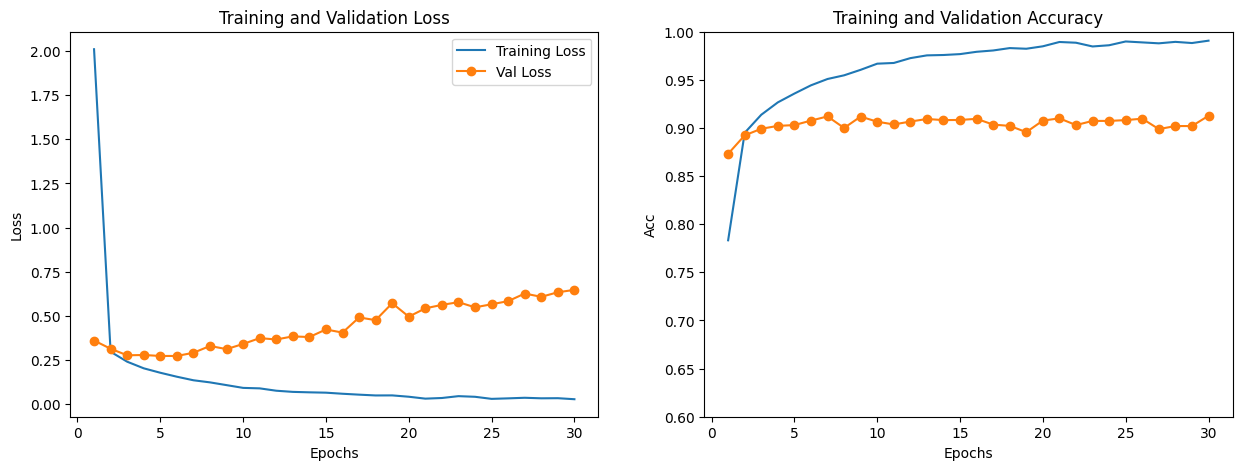

In [ ]:
plot1 = history.history
     

train_loss, val_loss = plot1['loss'], plot1['val_loss']
train_acc, val_acc = plot1['accuracy'], plot1['val_accuracy']
     

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
epoch_runs = [i+1 for i in range(30)]
ax1.plot(epoch_runs, train_loss, label="Training Loss")
ax1.plot(epoch_runs, val_loss, marker='o', label="Val Loss")
ax1.set(title='Training and Validation Loss', xlabel='Epochs', ylabel='Loss')
ax1.legend()

ax2.plot(epoch_runs, train_acc, label="Training Acc")
ax2.plot(epoch_runs, val_acc, marker='o', label="Val Acc")
ax2.set(title='Training and Validation Accuracy', xlabel='Epochs', ylabel='Acc', ylim=[0.6, 1])
plt.show()

In [ ]:
history = model.fit(x_train_mnist,
                    y_train_mnist,
                    validation_data = (x_val_mnist, y_val_mnist),
                    epochs=30,
                    batch_size = 256)

Epoch 1/30
211/211 [==============================] - 4s 15ms/step - loss: 1.1538 - accuracy: 0.8811 - val_loss: 0.1044 - val_accuracy: 0.9703
Epoch 2/30
211/211 [==============================] - 2s 11ms/step - loss: 0.0647 - accuracy: 0.9802 - val_loss: 0.0754 - val_accuracy: 0.9793
Epoch 3/30
211/211 [==============================] - 2s 11ms/step - loss: 0.0346 - accuracy: 0.9894 - val_loss: 0.0777 - val_accuracy: 0.9812
Epoch 4/30
211/211 [==============================] - 2s 12ms/step - loss: 0.0230 - accuracy: 0.9930 - val_loss: 0.0773 - val_accuracy: 0.9835
Epoch 5/30
211/211 [==============================] - 3s 14ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0880 - val_accuracy: 0.9833
Epoch 6/30
211/211 [==============================] - 3s 16ms/step - loss: 0.0107 - accuracy: 0.9966 - val_loss: 0.0894 - val_accuracy: 0.9828
Epoch 7/30
211/211 [==============================] - 2s 10ms/step - loss: 0.0067 - accuracy: 0.9976 - val_loss: 0.0877 - val_accuracy: 0.9838

In [ ]:
test_score = model.evaluate(x_test_mnist, y_test_mnist, batch_size = 32)
print(test_score)

313/313 [==============================] - 1s 3ms/step - loss: 0.1065 - accuracy: 0.9863
[0.1064850240945816, 0.986299991607666]


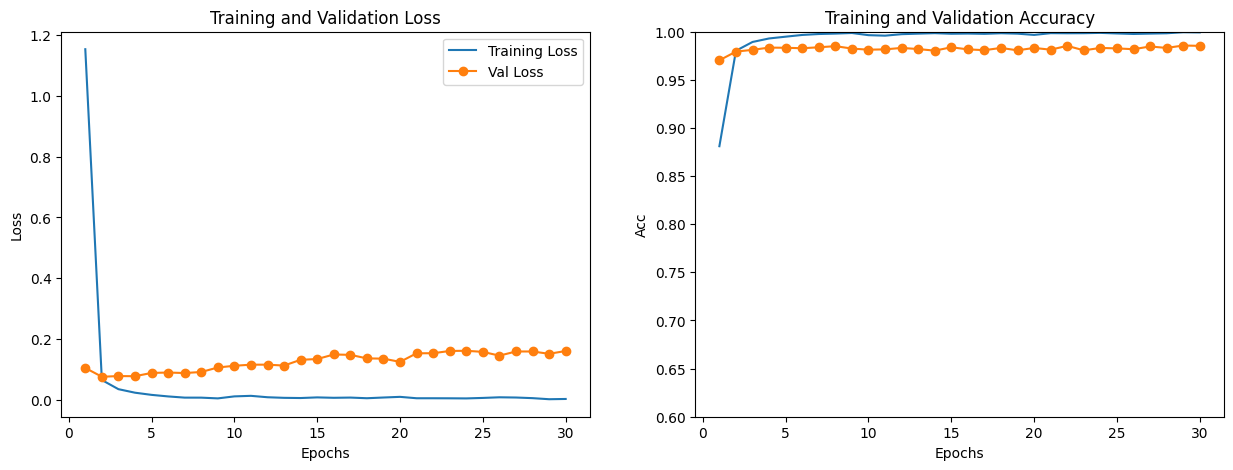

In [ ]:
plot1 = history.history
     
train_loss, val_loss = plot1['loss'], plot1['val_loss']
train_acc, val_acc = plot1['accuracy'], plot1['val_accuracy']
     

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
epoch_runs = [i+1 for i in range(30)]
ax1.plot(epoch_runs, train_loss, label="Training Loss")
ax1.plot(epoch_runs, val_loss, marker='o', label="Val Loss")
ax1.set(title='Training and Validation Loss', xlabel='Epochs', ylabel='Loss')
ax1.legend()

ax2.plot(epoch_runs, train_acc, label="Training Acc")
ax2.plot(epoch_runs, val_acc, marker='o', label="Val Acc")
ax2.set(title='Training and Validation Accuracy', xlabel='Epochs', ylabel='Acc', ylim=[0.6, 1])
plt.show()

#LeNet


In [44]:
LeNet = models.Sequential()


LeNet.add(Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='sigmoid', input_shape=input_shape))
LeNet.add(MaxPool2D(strides=2))
LeNet.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='sigmoid'))
LeNet.add(MaxPool2D(strides=2))
LeNet.add(Flatten())
LeNet.add(Dense(120, activation='sigmoid'))
LeNet.add(Dense(84, activation='sigmoid'))
LeNet.add(Dense(10, activation='softmax'))

LeNet.build()
adam = Adam(lr=5e-4)
LeNet.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)
LeNet.summary()

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

datagen = ImageDataGenerator(
            rotation_range=10, 
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1)
datagen.fit(x_train_fashion_mnist)

plot_LeNet = LeNet.fit(datagen.flow(x_train_fashion_mnist, 
                                       y_train_fashion_mnist, 
                                       batch_size=100), 
                          steps_per_epoch=len(x_train_fashion_mnist)/100,
                          epochs=50, 
                          validation_data = (x_val_fashion_mnist, y_val_fashion_mnist),
                          callbacks=[reduce_lr])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_5 (Dense)             (None, 120)              

In [ ]:
LeNet.evaluate(x_test_fashion_mnist, y_test_fashion_mnist, batch_size = 32)

313/313 [==============================] - 1s 3ms/step - loss: 0.3789 - accuracy: 0.8582


[0.37888485193252563, 0.8582000136375427]

In [ ]:
history_LeNet = plot_LeNet.history
     

train_loss, val_loss = history_LeNet['loss'], history_LeNet['val_loss']
train_acc, val_acc = history_LeNet['accuracy'], history_LeNet['val_accuracy']
     

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
epoch_runs = [i+1 for i in range(50)]
ax1.plot(epoch_runs, train_loss, label="Training Loss")
ax1.plot(epoch_runs, val_loss, marker='o', label="Val Loss")
ax1.set(title='Training and Validation Loss', xlabel='Epochs', ylabel='Loss')
ax1.legend()

ax2.plot(epoch_runs, train_acc, label="Training Acc")
ax2.plot(epoch_runs, val_acc, marker='o', label="Val Acc")
ax2.set(title='Training and Validation Accuracy', xlabel='Epochs', ylabel='Acc', ylim=[0.6, 1])
plt.show()

NameError: ignored

In [ ]:
LeNet_mnist = models.Sequential()


LeNet_mnist.add(Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='sigmoid', input_shape=input_shape))
LeNet_mnist.add(MaxPool2D(strides=2))
LeNet_mnist.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='sigmoid'))
LeNet_mnist.add(MaxPool2D(strides=2))
LeNet_mnist.add(Flatten())
LeNet_mnist.add(Dense(120, activation='sigmoid'))
LeNet_mnist.add(Dense(84, activation='sigmoid'))
LeNet_mnist.add(Dense(10, activation='softmax'))

LeNet_mnist.build()
adam = Adam(lr=5e-4)
LeNet_mnist.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)
LeNet_mnist.summary()

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

datagen = ImageDataGenerator(
            rotation_range=10, 
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1)
datagen.fit(x_train_fashion_mnist)

plot_LeNet_mnist = LeNet_mnist.fit(datagen.flow(x_train_mnist, 
                                       y_train_mnist, 
                                       batch_size=100), 
                          steps_per_epoch=len(x_train_mnist)/100,
                          epochs=50,
                          validation_data = (x_val_mnist, y_val_mnist),
                          callbacks=[reduce_lr])

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 400)               0         
                                                                 
 dense_44 (Dense)            (None, 120)             

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
540/540 [==============================] - 17s 31ms/step - loss: 1.8289 - accuracy: 0.3821 - val_loss: 0.8684 - val_accuracy: 0.7905 - lr: 5.0000e-04
Epoch 2/50
540/540 [==============================] - 17s 31ms/step - loss: 0.8065 - accuracy: 0.7621 - val_loss: 0.4044 - val_accuracy: 0.9115 - lr: 5.0000e-04
Epoch 3/50
540/540 [==============================] - 18s 34ms/step - loss: 0.4552 - accuracy: 0.8728 - val_loss: 0.2272 - val_accuracy: 0.9415 - lr: 5.0000e-04
Epoch 4/50
540/540 [==============================] - 17s 31ms/step - loss: 0.3076 - accuracy: 0.9119 - val_loss: 0.1702 - val_accuracy: 0.9532 - lr: 5.0000e-04
Epoch 5/50
540/540 [==============================] - 17s 32ms/step - loss: 0.2494 - accuracy: 0.9269 - val_loss: 0.1414 - val_accuracy: 0.9583 - lr: 5.0000e-04
Epoch 6/50
540/540 [==============================] - 16s 30ms/step - loss: 0.2128 - accuracy: 0.9356 - val_loss: 0.1203 - val_accuracy: 0.9642 - lr: 5.0000e-04
Epoch 7/50
540/540 [==============

In [ ]:
LeNet_mnist.evaluate(x_test_mnist, y_test_mnist, batch_size = 32)

In [ ]:
history_LeNet_mnist = plot_LeNet_mnist.history
   

train_loss, val_loss = history_LeNet_mnist['loss'], history_LeNet_mnist['val_loss']
train_acc, val_acc = history_LeNet_mnist['accuracy'], history_LeNet_mnist['val_accuracy']
     

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
epoch_runs = [i+1 for i in range(50)]
ax1.plot(epoch_runs, train_loss, label="Training Loss")
ax1.plot(epoch_runs, val_loss, marker='o', label="Val Loss")
ax1.set(title='Training and Validation Loss', xlabel='Epochs', ylabel='Loss')
ax1.legend()

ax2.plot(epoch_runs, train_acc, label="Training Acc")
ax2.plot(epoch_runs, val_acc, marker='o', label="Val Acc")
ax2.set(title='Training and Validation Accuracy', xlabel='Epochs', ylabel='Acc', ylim=[0.6, 1])
plt.show()

In [ ]:
LeNet_model = models.Sequential()


LeNet_model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=input_shape))
LeNet_model.add(MaxPool2D(strides=2))
LeNet_model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
LeNet_model.add(MaxPool2D(strides=2))
LeNet_model.add(Flatten())
LeNet_model.add(Dense(256, activation='relu'))
LeNet_model.add(Dense(84, activation='relu'))
LeNet_model.add(Dense(10, activation='softmax'))

LeNet_model.build()
adam = Adam(lr=5e-4)
LeNet_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)
LeNet_model.summary()

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

datagen = ImageDataGenerator(
            rotation_range=10, 
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1)
datagen.fit(x_train_fashion_mnist)

plot2 = LeNet_model.fit(datagen.flow(x_train_fashion_mnist, 
                                       y_train_fashion_mnist, 
                                       batch_size=100), 
                          steps_per_epoch=len(x_train_fashion_mnist)/100,
                          epochs=30, 
                          validation_data = (x_val_fashion_mnist, y_val_fashion_mnist),
                          callbacks=[reduce_lr])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 5, 5, 48)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 1200)              0         
                                                                 
 dense_25 (Dense)            (None, 256)             

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
540/540 [==============================] - 22s 39ms/step - loss: 0.9129 - accuracy: 0.7281 - val_loss: 0.5146 - val_accuracy: 0.8040 - lr: 5.0000e-04
Epoch 2/30
540/540 [==============================] - 20s 36ms/step - loss: 0.5220 - accuracy: 0.8044 - val_loss: 0.3982 - val_accuracy: 0.8570 - lr: 5.0000e-04
Epoch 3/30
540/540 [==============================] - 17s 31ms/step - loss: 0.4600 - accuracy: 0.8276 - val_loss: 0.4066 - val_accuracy: 0.8657 - lr: 5.0000e-04
Epoch 4/30
540/540 [==============================] - 18s 33ms/step - loss: 0.4291 - accuracy: 0.8374 - val_loss: 0.3597 - val_accuracy: 0.8705 - lr: 5.0000e-04
Epoch 5/30
540/540 [==============================] - 19s 36ms/step - loss: 0.4096 - accuracy: 0.8474 - val_loss: 0.3551 - val_accuracy: 0.8795 - lr: 5.0000e-04
Epoch 6/30
540/540 [==============================] - 19s 36ms/step - loss: 0.3894 - accuracy: 0.8551 - val_loss: 0.3222 - val_accuracy: 0.8818 - lr: 5.0000e-04
Epoch 7/30
540/540 [==============

In [ ]:
score2 = LeNet_model.evaluate(x_test_fashion_mnist, y_test_fashion_mnist,batch_size = 32)

313/313 [==============================] - 1s 3ms/step - loss: 0.2531 - accuracy: 0.9119


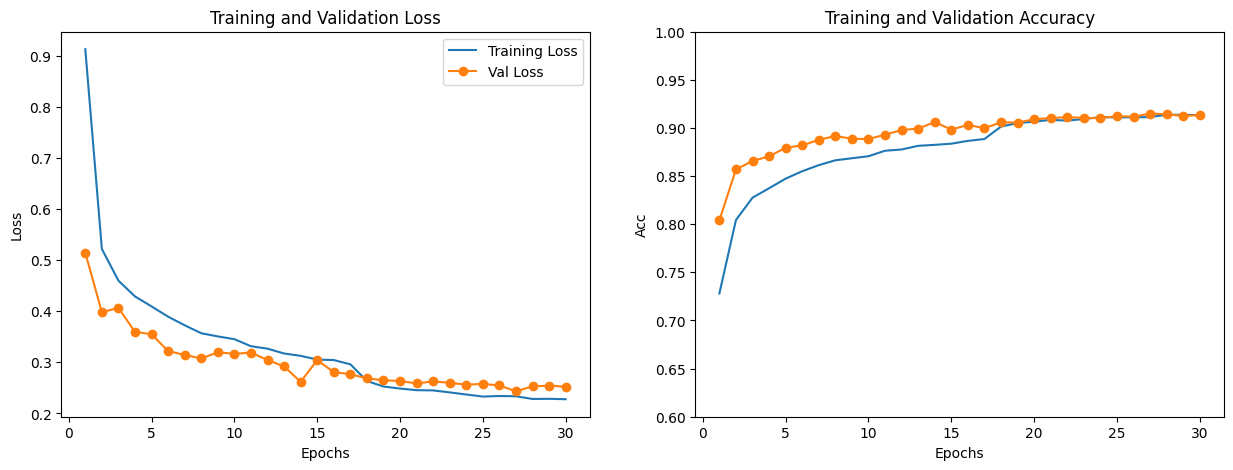

In [ ]:
history_fashion_dict = plot2.history
     

train_loss, val_loss = history_fashion_dict['loss'], history_fashion_dict['val_loss']
train_acc, val_acc = history_fashion_dict['accuracy'], history_fashion_dict['val_accuracy']
     

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
epoch_runs = [i+1 for i in range(30)]
ax1.plot(epoch_runs, train_loss, label="Training Loss")
ax1.plot(epoch_runs, val_loss, marker='o', label="Val Loss")
ax1.set(title='Training and Validation Loss', xlabel='Epochs', ylabel='Loss')
ax1.legend()

ax2.plot(epoch_runs, train_acc, label="Training Acc")
ax2.plot(epoch_runs, val_acc, marker='o', label="Val Acc")
ax2.set(title='Training and Validation Accuracy', xlabel='Epochs', ylabel='Acc', ylim=[0.6, 1])
plt.show()

In [ ]:
LeNet_model2 = models.Sequential()


LeNet_model2.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=input_shape))
LeNet_model2.add(MaxPool2D(strides=2))
LeNet_model2.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
LeNet_model2.add(MaxPool2D(strides=2))
LeNet_model2.add(Flatten())
LeNet_model2.add(Dense(256, activation='relu'))
LeNet_model2.add(Dense(84, activation='relu'))
LeNet_model2.add(Dense(10, activation='softmax'))

LeNet_model2.build()
LeNet_model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)
LeNet_model2.summary()

datagen2 = ImageDataGenerator(
            rotation_range=10,
            width_shift_range=0.1,
            height_shift_range=0.1,
            zoom_range=0.1)
datagen2.fit(x_train_mnist)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 48)         0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 1200)              0         
                                                                 
 dense_28 (Dense)            (None, 256)             

In [ ]:
history_mnist = LeNet_model2.fit(datagen.flow(x_train_mnist,
                                       y_train_mnist,
                                       batch_size=100),
                          steps_per_epoch=len(x_train_mnist)/100,
                          epochs=50,
                          validation_data = (x_val_mnist, y_val_mnist),
                          callbacks=[reduce_lr])

Epoch 1/50
540/540 [==============================] - 21s 39ms/step - loss: 1.5454 - accuracy: 0.7155 - val_loss: 0.3592 - val_accuracy: 0.8928 - lr: 2.0000e-05
Epoch 2/50
540/540 [==============================] - 18s 33ms/step - loss: 0.4445 - accuracy: 0.8686 - val_loss: 0.2530 - val_accuracy: 0.9250 - lr: 2.0000e-05
Epoch 3/50
540/540 [==============================] - 17s 32ms/step - loss: 0.3348 - accuracy: 0.9003 - val_loss: 0.1957 - val_accuracy: 0.9400 - lr: 2.0000e-05
Epoch 4/50
540/540 [==============================] - 17s 31ms/step - loss: 0.2673 - accuracy: 0.9200 - val_loss: 0.1707 - val_accuracy: 0.9502 - lr: 2.0000e-05
Epoch 5/50
540/540 [==============================] - 17s 31ms/step - loss: 0.2217 - accuracy: 0.9333 - val_loss: 0.1484 - val_accuracy: 0.9558 - lr: 2.0000e-05
Epoch 6/50
540/540 [==============================] - 17s 31ms/step - loss: 0.1979 - accuracy: 0.9412 - val_loss: 0.1333 - val_accuracy: 0.9597 - lr: 2.0000e-05
Epoch 7/50
540/540 [==============

In [ ]:
LeNet_model2.evaluate(x_test_mnist, y_test_mnist, batch_size = 32)

313/313 [==============================] - 1s 3ms/step - loss: 0.0384 - accuracy: 0.9878


[0.03842460736632347, 0.9878000020980835]

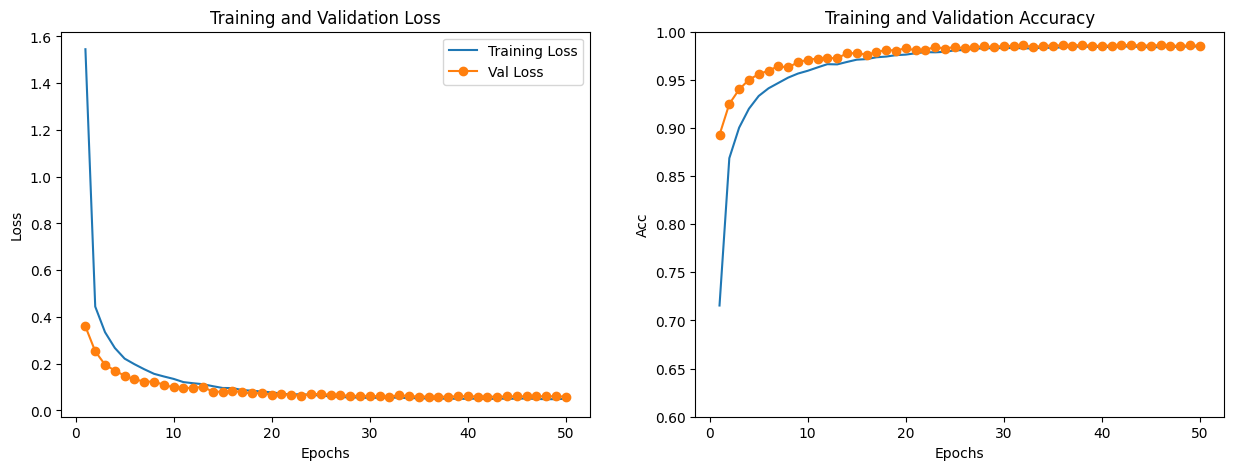

In [ ]:
history_mnist_dict = history_mnist.history
     

train_loss, val_loss = history_mnist_dict['loss'], history_mnist_dict['val_loss']
train_acc, val_acc = history_mnist_dict['accuracy'], history_mnist_dict['val_accuracy']
     

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
epoch_runs = [i+1 for i in range(50)]
ax1.plot(epoch_runs, train_loss, label="Training Loss")
ax1.plot(epoch_runs, val_loss, marker='o', label="Val Loss")
ax1.set(title='Training and Validation Loss', xlabel='Epochs', ylabel='Loss')
ax1.legend()

ax2.plot(epoch_runs, train_acc, label="Training Acc")
ax2.plot(epoch_runs, val_acc, marker='o', label="Val Acc")
ax2.set(title='Training and Validation Accuracy', xlabel='Epochs', ylabel='Acc', ylim=[0.6, 1])
plt.show()

#AlexNet

In [ ]:
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras.models import Sequential
from keras.losses import categorical_crossentropy


alexnet = Sequential()

	# Layer 1
alexnet.add(Conv2D(96, (11, 11), input_shape=input_shape, padding='same', kernel_regularizer=l2(0)))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
alexnet.add(Conv2D(256, (5, 5), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3
alexnet.add(ZeroPadding2D((1, 1)))
alexnet.add(Conv2D(512, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4
alexnet.add(ZeroPadding2D((1, 1)))
alexnet.add(Conv2D(1024, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))

# Layer 5
alexnet.add(ZeroPadding2D((1, 1)))
alexnet.add(Conv2D(1024, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 6
alexnet.add(Flatten())
alexnet.add(Dense(3072))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.5))

# Layer 7
alexnet.add(Dense(4096))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.5))

# Layer 8
alexnet.add(Dense(class_nums))
alexnet.add(BatchNormalization())
alexnet.add(Activation('softmax'))

In [ ]:
alexnet.compile(loss = categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])
alexnet.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 28, 28, 96)        11712     
                                                                 
 batch_normalization_16 (Bat  (None, 28, 28, 96)       384       
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 28, 28, 96)        0         
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 14, 14, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 14, 14, 256)       614656    
                                                                 
 batch_normalization_17 (Bat  (None, 14, 14, 256)    

In [ ]:
alexnet.fit(x_train_fashion_mnist,
                    y_train_fashion_mnist,
                    validation_data = (x_val_fashion_mnist, y_val_fashion_mnist),
                    epochs=50,
                    batch_size = 256)

Epoch 1/50
211/211 [==============================] - 77s 285ms/step - loss: 0.6246 - accuracy: 0.8437 - val_loss: 0.9507 - val_accuracy: 0.7712
Epoch 2/50
211/211 [==============================] - 46s 220ms/step - loss: 0.4247 - accuracy: 0.8932 - val_loss: 1.0350 - val_accuracy: 0.8462
Epoch 3/50
211/211 [==============================] - 48s 226ms/step - loss: 0.3488 - accuracy: 0.9074 - val_loss: 0.5668 - val_accuracy: 0.8627
Epoch 4/50
211/211 [==============================] - 46s 220ms/step - loss: 0.2971 - accuracy: 0.9166 - val_loss: 0.4062 - val_accuracy: 0.9058
Epoch 5/50
211/211 [==============================] - 47s 221ms/step - loss: 0.2595 - accuracy: 0.9249 - val_loss: 0.4595 - val_accuracy: 0.8712
Epoch 6/50
211/211 [==============================] - 47s 220ms/step - loss: 0.2321 - accuracy: 0.9316 - val_loss: 0.4485 - val_accuracy: 0.8692
Epoch 7/50
211/211 [==============================] - 47s 225ms/step - loss: 0.2063 - accuracy: 0.9378 - val_loss: 0.3511 - val_ac

In [ ]:
alexnet.evaluate(x_test_fashion_mnist, y_test_fashion_mnist)

313/313 [==============================] - 6s 15ms/step - loss: 0.3938 - accuracy: 0.9082


[0.3937714695930481, 0.9082000255584717]

In [ ]:
alexnet_plot = history_mnist.history
     

train_loss, val_loss = alexnet_plot['loss'], alexnet_plot['val_loss']
train_acc, val_acc = alexnet_plot['accuracy'], alexnet_plot['val_accuracy']
     

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
epoch_runs = [i+1 for i in range(50)]
ax1.plot(epoch_runs, train_loss, label="Training Loss")
ax1.plot(epoch_runs, val_loss, marker='o', label="Val Loss")
ax1.set(title='Training and Validation Loss', xlabel='Epochs', ylabel='Loss')
ax1.legend()

ax2.plot(epoch_runs, train_acc, label="Training Acc")
ax2.plot(epoch_runs, val_acc, marker='o', label="Val Acc")
ax2.set(title='Training and Validation Accuracy', xlabel='Epochs', ylabel='Acc', ylim=[0.8, 1])
plt.show()

NameError: ignored